In [24]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np


In [9]:
# Load the dataset
crops = pd.read_csv("D://Data Science//predictive crops project//soil_measures.csv")


In [10]:
crops.dtypes

N         int64
P         int64
K         int64
ph      float64
crop     object
dtype: object

In [11]:
crops.columns

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

In [12]:
crops.isna().sum().sort_values()

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

In [15]:
x = crops.drop('crop', axis=1).values
y = crops['crop'].values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)


In [18]:
results =[]
alpha_valuse  = np.linspace(0.001, 1,20)

for alpha in alpha_valuse:
    Logreg = LogisticRegression(alpha = alpha)
    logreg.fit(x_train, y_train)
    y_hat = Logreg.predict(x_test)
    score = Logreg.score(y_test, y_hat)
    print (confusio)
    
    

In [22]:
c_values = np.linspace(0.001, 1, 20)

# Lists to store results
results = []

# Loop through different C values
for c in c_values:
    logreg = LogisticRegression(C=c, max_iter=1000)  # Increase max_iter if needed
    logreg.fit(x_train, y_train)
    score = logreg.score(x_test, y_test)
    results.append((c, score))

# Convert results to DataFrame for easy viewing
import pandas as pd
results_df = pd.DataFrame(results, columns=['C', 'Accuracy'])
print(results_df)

c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

           C  Accuracy
0   0.001000  0.620455
1   0.053579  0.663636
2   0.106158  0.627273
3   0.158737  0.675000
4   0.211316  0.597727
5   0.263895  0.634091
6   0.316474  0.606818
7   0.369053  0.613636
8   0.421632  0.618182
9   0.474211  0.615909
10  0.526789  0.618182
11  0.579368  0.615909
12  0.631947  0.615909
13  0.684526  0.618182
14  0.737105  0.613636
15  0.789684  0.615909
16  0.842263  0.611364
17  0.894842  0.618182
18  0.947421  0.625000
19  1.000000  0.613636


c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Find the best C value
best_c, best_accuracy = max(results, key=lambda x: x[1])
print(f"Best C value: {best_c}, Accuracy: {best_accuracy}")


Best C value: 0.15873684210526315, Accuracy: 0.675


c:\Users\Koko Ellally\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


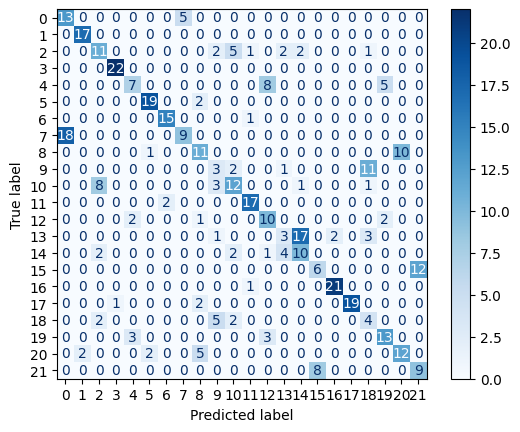

In [35]:
# Train the model with the best C value
best_logreg = LogisticRegression(C=best_c, max_iter=200)
best_logreg.fit(x_train, y_train)

# Predict on the test set
y_pred = best_logreg.predict(x_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_logreg.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')